In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

In [ ]:
# Loading the MNIST handwritten digits dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:    ", x_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape:     (10000, 28, 28) (10000,)


In [ ]:
# Preprocessing

# Normalize to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# Flatten 28x28 → 784
x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

# One-hot encode labels (10 classes)
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical  = to_categorical(y_test,  num_classes=10)

print("After preprocessing:")
print(" x_train shape:", x_train.shape)
print(" y_train_categorical shape:", y_train_categorical.shape)


After preprocessing:
 x_train shape: (60000, 784)
 y_train_categorical shape: (60000, 10)


In [ ]:
# Model Architecture
model = models.Sequential([
    layers.Input(shape=(784,)),

    # Hidden Layer 1
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.4),

    # Hidden Layer 2
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.3),

    # Hidden Layer 3
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),

    # Output Layer
    layers.Dense(10, activation='softmax')])

In [ ]:
# Model Compilation & Training

# Compiling the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trainimg the model
history = model.fit(x_train, y_train_categorical, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7600 - loss: 0.7828 - val_accuracy: 0.9635 - val_loss: 0.1262
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9220 - loss: 0.2593 - val_accuracy: 0.9742 - val_loss: 0.0881
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9361 - loss: 0.2093 - val_accuracy: 0.9735 - val_loss: 0.0869
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9482 - loss: 0.1721 - val_accuracy: 0.9777 - val_loss: 0.0732
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9535 - loss: 0.1539 - val_accuracy: 0.9800 - val_loss: 0.0697
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9587 - loss: 0.1344 - val_accuracy: 0.9803 - val_loss: 0.0660
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9607 - loss: 0.1284 - val_accuracy: 0.9823 - val_loss: 0.0620
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9651 - loss: 0.1165 - val_accuracy

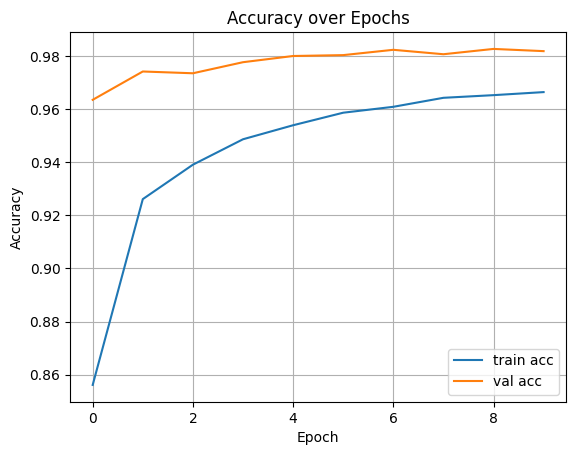

In [ ]:
# Visualization

# Plot Training vs. Validation Accuracy over Epochs
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

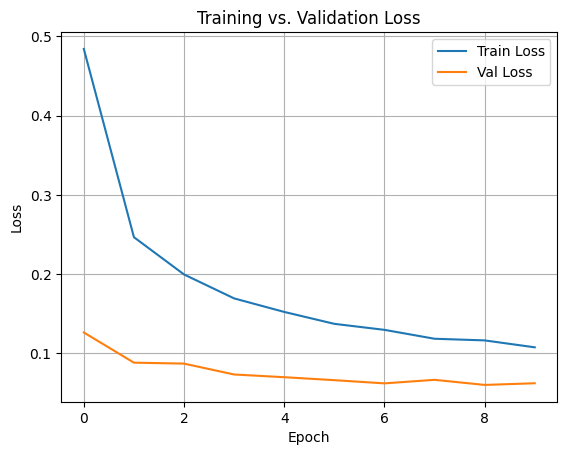

In [ ]:
# Plot Training vs. Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluation
loss, acc = model.evaluate(x_test, y_test_categorical)
print(f"Test Accuracy: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0812
Test Accuracy: 97.90%
